In [6]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd


In [54]:
def rgbtohex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [99]:
def resizing(img):
    src = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    width=int(src.shape[1]) 
    height = int(src.shape[0])
    if width>500 or height>500:
        return cv2.resize(src,(500,500))
    return src

In [100]:
def img_color_pallete(original_image, k=8):
    img=resizing(original_image)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    w, h, d = original_shape = tuple(img.shape)
    image_array = np.reshape(img, (w * h, d))
    kmeans = KMeans(n_clusters=k).fit(image_array)
    labels = kmeans.predict(image_array)
    df=pd.DataFrame({"labels":labels})
    label_orders=df['labels'].value_counts().to_dict()
    center_colors = list(kmeans.cluster_centers_)
    colors_ordering=[center_colors[i]/255 for i in label_orders.keys()]
    color_labels = [rgbtohex(colors_ordering[i]*255) for i in label_orders.keys()]
    return img,label_orders,colors_ordering,color_labels



In [101]:
def color_pallet_plot(image,k=8):
    img,label_orders,colors_ordering,color_labels=img_color_pallete(image, k=8)
    plt.figure(figsize=(20, 10))
    plt.subplot(221)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(222)
    patches, texts =plt.pie(label_orders.values(), colors=colors_ordering, startangle=90)
    plt.legend(patches, color_labels, loc="center right")
    #plt.tight_layout()
    plt.axis('equal')
    plt.show()  

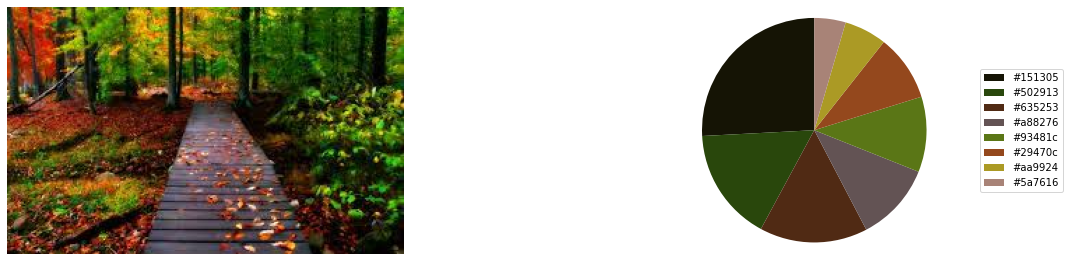

In [102]:
color_pallet_plot(os.path.join('images', 'nature.jpg'),k=8)

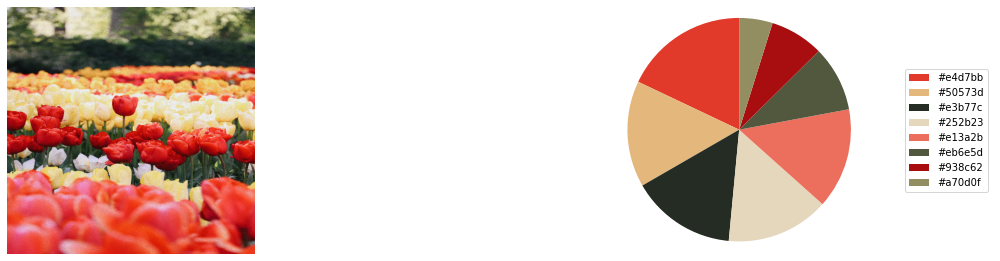

In [103]:
color_pallet_plot(os.path.join('images', 'flower.jpg'),k=8)

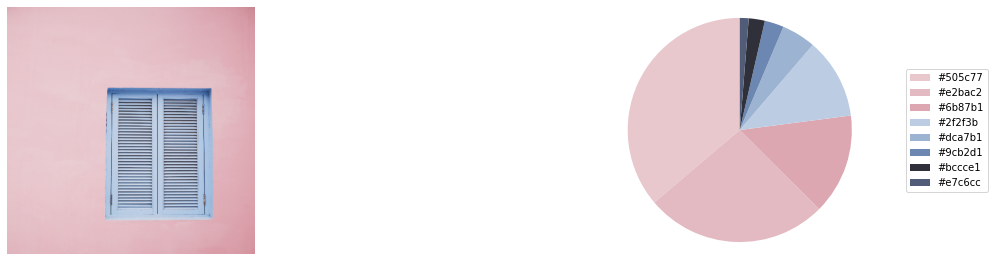

In [104]:
color_pallet_plot(os.path.join('images', 'wall.jpg'),k=8)